# Business Understanding

## Background

Dalam industri asuransi, prediksi klaim yang akurat memainkan peran penting dalam mengelola risiko dan menjaga profitabilitas. Pemrosesan klaim yang efisien sangat penting untuk kepuasan pelanggan dan kesuksesan bisnis secara keseluruhan. Penanganan klaim pelanggan yang tepat waktu dan akurat adalah tugas kompleks yang melibatkan penilaian berbagai faktor dan pengambilan keputusan yang tepat. Perusahaan asuransi sering menghadapi tantangan dalam mengelola volume klaim, mengidentifikasi klaim palsu, dan memastikan penyelesaian yang adil dan cepat.

Untuk mengatasi tantangan ini, memanfaatkan machine learning dapat meningkatkan efisiensi dan akurasi pemrosesan klaim secara signifikan. Dengan mengembangkan sistem prediksi status klaim pelanggan yang baik, perusahaan asuransi dapat merampingkan operasinya, meningkatkan pengalaman pelanggan, dan mengoptimalkan alokasi sumber daya.

## Goals

Tujuan utama dari proyek ini adalah untuk mengembangkan model prediktif yang dapat secara efektif menentukan status klaim pelanggan asuransi. Model ini bertujuan untuk memanfaatkan data historis, menggabungkan informasi pelanggan yang relevan, detail klaim, dan faktor kontekstual lainnya untuk memberikan prediksi yang akurat mengenai persetujuan atau penolakan klaim.

- Membuat model machine learning tembahan yang dapat memprediksi status klaim. Perusahaan berharap dapat memproses klaim dengan lebih cepat dan tepat. Hal ini akan membantu menghindari keputusan klaim yang bermasalah dan mengurangi waktu tunggu pelanggan.
<br><br>
- Mengetahui hubungan antara atribut-atribut dalam dataset dengan status klaim untuk mengidentifikasi faktor-faktor yang memiliki pengaruh signifikan.

**Implementasi**

Model Machine Learning dapat dimanfaatkan oleh tim pengelola klaim perusahaan dengan menggabungkan model yang sudah ada sebelumnya. Saat pelanggan mengajukan klaim, tim pengelola klaim perusahaan dapat memanfaatkan machine learning sebagai salah satu referensi dalam pengambilan keputusan klaim. Pelanggan akan mendapatkan keputusan klaim yang lebih cepat dan lebih adil, serta mengurangi waktu tunggu mereka dalam proses klaim asuransi perjalanan.

## Analytics Approach
Salah satu potensi kesalahan yang dapat terjadi pada model machine learning adalah **"Type Error 1"** dan **"Type Error 2"**.

- Type Error 1 (False Positive) terjadi ketika model salah memprediksi klaim pelanggan sebagai disetujui (positif) padahal seharusnya ditolak (negatif). Jenis kesalahan ini dapat mengakibatkan kerugian finansial bagi perusahaan asuransi jika klaim yang seharusnya ditolak justru disetujui secara keliru.<br><br>
- Type Error 2 (False Negative) terjadi ketika model salah memprediksi klaim pelanggan sebagai ditolak (negatif) padahal seharusnya disetujui (positif). Jenis kesalahan ini dapat menyebabkan ketidakpuasan pelanggan dan potensi konsekuensi hukum jika klaim yang sah ditolak secara tidak adil.

Menggunakan **ROC dan AUC** dalam proyek ini memungkinkan evaluasi kinerja model yang komprehensif, dengan mempertimbangkan Type Error 1 (False Positive) dan Type Error 2 (False Negative) dan memperhitungkan data yang tidak seimbang. Ini memberikan penilaian yang kuat dan informatif, membantu dalam proses pengambilan keputusan untuk persetujuan atau penolakan klaim

# Data Understanding

## Data Information

| Variable              | Definition                                       |
|-----------------------|--------------------------------------------------|
| Claim Status          | Target: Claim Status                             |
| Agency                | Name of agency                                   |
| Agency Type           | Type of travel insurance agencies                |
| Distribution Channel  | Distribution channel of travel insurance agencies|
| Product Name          | Name of the travel insurance products            |
| Duration              | Duration of travel                               |
| Destination           | Destination of travel                            |
| Net Sales             | Amount of sales of travel insurance policies     |
| Commission            | Commission received for travel insurance agency  |
| Gender                | Gender of insured                                |
| Age                   | Age of insured                                   |

Untuk mempermudah proses analisa pada machine learning, Claim Status akan diubah value-nya menjadi:
- Claim Status = 1 artinya klaim telah disetujui atau diterima
- Claim Status = 0 artinya tidak melakukan claim atau *tidak* disetujui (ditolak)

# Exploratory Data Analysis

In [1]:
# Libraries

# Data
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocessing
# Encoding
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Model
import multiprocessing
import time
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, HalvingGridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay, recall_score, f1_score, roc_auc_score

### Inspecting Data

In [2]:
# Load Data
travel = pd.read_csv('data_travel_insurance.csv')

# Set the option to show all columns
pd.set_option('display.max_columns', None)

travel

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [3]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
# Create an empty DataFrame to store the results
unique_values_df = pd.DataFrame(columns=["Column Name", "Number of Unique", "Unique Values"])

# Iterate over columns in the 'travel' DataFrame
for column in travel.columns:
    # Calculate the number of unique values in each column
    num_unique = travel[column].nunique()
    
    # Get the unique values in each column
    unique_vals = travel[column].unique()
    
    # Create a temporary DataFrame for each column
    temp_df = pd.DataFrame({
        "Column Name": [column],
        "Number of Unique": [num_unique],
        "Unique Values": [unique_vals]
    })
    
    # Concatenate the temporary DataFrame to the 'unique_values_df'
    unique_values_df = pd.concat([unique_values_df, temp_df], ignore_index=True)
    
unique_values_df

,Column Name,Number of Unique,Unique Values
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."


In [5]:
# Checking Duplicate Data
travel.duplicated().sum()

4667

In [6]:
# Checking Duplicate Data Proportion
travel.duplicated().sum() / len(travel)

0.10528334235697527

Berdasarkan hasil pemeriksaan data, berikut adalah beberapa insight yang didapat untuk memulai membentuk model:
1. **Format Data** <br> Setiap kolom memiliki format data yang sesuai dan konsisten<br><br>
1. **Duplicate Data** <br> Terdapat data duplikat pada dataset, perlu dilakukan proses cleaning sesuai keperluan<br><br>
1. **Missing Values** <br> Kolom "Gender" memiliki sejumlah besar nilai yang hilang (NaN)<br><br>
1. **Categorical Variables** <br> Kolom berikut dapat dipertimbangkan untuk dapat dibuat numerical data dengan metode encoding agar mempermudah proses modeling 
    - Agency
    - Agency Type
    - Distribution Channel
    - Product Name
    - Destination <br><br>
1. **Numerical Variables** <br> Pemeriksaan lebih lanjut perlu dilakukan untuk melihat hubungan numerical data dengan proses keputusan klaim untuk analisa pembuatan machine learning
    - Duration
    - Net Sales
    - Commision (in value)
    - Age <br><br>
1. **Data Balancing (Imbalanced Classes)**<br> Kolom "Claim" sebagaimana target prediksi perlu dianalisa untuk melihat potensi kelas yang tidak seimbang

### Data Duplicate

In [7]:
# Remove Duplicate Data
travel.drop_duplicates(inplace=True)

# Checking Duplicate Data
travel.duplicated().sum()

0

Data duplikat dihapus karena dapat berpotensi mempengaruhi model menjadi:
- Membuat waktu training model menjadi lebih lama 
- Data yang redundant tersebut dapat memberikan informasi yang berlebihan ke model, yang mungkin tidak berkontribusi secara signifikan terhadap training model.

### Missing Value

In [8]:
# Count Proportion Missing Value

def calculate_proportion(df, column_name):
    counts = df[column_name].value_counts(dropna=False)
    total = counts.sum()
    proportions = counts / total * 100
    for value, proportion in proportions.items():
        if pd.isna(value):  # Handle missing values
            print("Missing = {:.2f}%".format(proportion))
        else:
            print("{} = {:.2f}%".format(value, proportion))

In [9]:
calculate_proportion(travel, 'Gender')

Missing = 69.76%
M = 15.31%
F = 14.93%


In [10]:
travel = travel.drop(['Gender'], axis=1)

In [11]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39661 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39661 non-null  object 
 1   Agency Type           39661 non-null  object 
 2   Distribution Channel  39661 non-null  object 
 3   Product Name          39661 non-null  object 
 4   Duration              39661 non-null  int64  
 5   Destination           39661 non-null  object 
 6   Net Sales             39661 non-null  float64
 7   Commision (in value)  39661 non-null  float64
 8   Age                   39661 non-null  int64  
 9   Claim                 39661 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.3+ MB


Nilai yang hilang dalam variabel "Gender" berjumlah sekitar 70% dari data, akan sulit untuk memprediksi / impute secara akurat. Dalam kasus seperti ini, menghapus kolom seluruhnya mungkin merupakan pendekatan yang paling sesuai. Dengan menghapus variabel "Gender" dari analisis, kita menghilangkan nilai yang hilang dan menghindari potensi bias atau prediksi yang salah jika melakukan impute data.

### Categorical Variables

In [12]:
def plot_claim_frequencies(data, column, figsize=(8, 5)):
    # Calculate the counts of 'Claim' values for each unique variable
    claim_counts = data.groupby(column)['Claim'].value_counts().unstack()

    # Construct the table with unique values and claim counts for each value
    table = claim_counts.copy()

    # Sort the table in descending order based on the 'Claim' = Yes column
    table_sorted = table.sort_values('Yes', ascending=False)

    # Create a new figure and axes with the desired size
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the stacked bar chart
    table_sorted.plot.bar(stacked=True, ax=ax)

    # Set the title and labels
    ax.set_title(f'Claim Frequencies by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right')

    # Display the chart
    plt.show()

    # Print the sorted table
    print('----Proportion Table----')
    print(table_sorted)
    
    # Calculate and print the table with percentages
    table_percentage = table_sorted.divide(table_sorted.sum(axis=1), axis=0) * 100
    print('')
    print('----Percentage Table----')
    print(table_percentage)

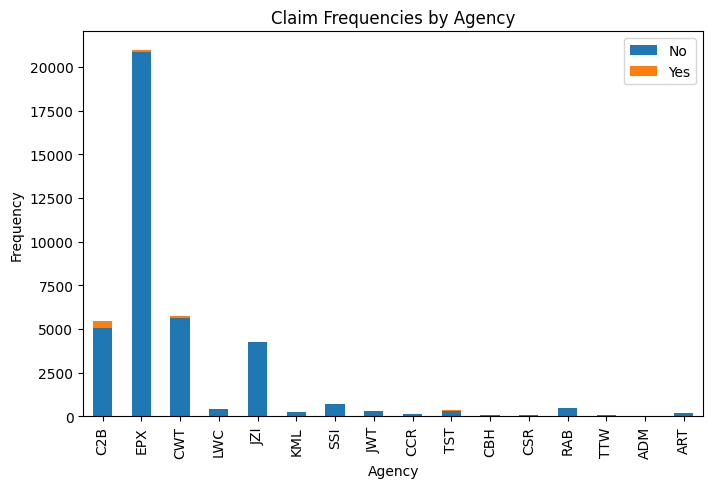

----Proportion Table----
Claim        No    Yes
Agency                
C2B      5088.0  405.0
EPX     20857.0  133.0
CWT      5662.0   64.0
LWC       424.0   29.0
JZI      4266.0   22.0
KML       244.0    5.0
SSI       706.0    5.0
JWT       333.0    4.0
CCR       116.0    2.0
TST       341.0    2.0
CBH        68.0    1.0
CSR        67.0    1.0
RAB       468.0    1.0
TTW        65.0    1.0
ADM        55.0    NaN
ART       226.0    NaN

----Percentage Table----
Claim           No       Yes
Agency                      
C2B      92.626980  7.373020
EPX      99.366365  0.633635
CWT      98.882291  1.117709
LWC      93.598234  6.401766
JZI      99.486940  0.513060
KML      97.991968  2.008032
SSI      99.296765  0.703235
JWT      98.813056  1.186944
CCR      98.305085  1.694915
TST      99.416910  0.583090
CBH      98.550725  1.449275
CSR      98.529412  1.470588
RAB      99.786780  0.213220
TTW      98.484848  1.515152
ADM     100.000000       NaN
ART     100.000000       NaN


In [13]:
plot_claim_frequencies(travel, 'Agency', figsize=(8, 5))

EPX tampaknya agensi paling populer. Walau begitu diketahui bahwa agensi C2B memiliki jumlah klaim yang paling tinggi. Informasi ini mungkin dapat berpengaruh relevan dalam memprediksi status klaim nantinya, karena agen tertentu mungkin memiliki prosedur penanganan klaim yang berbeda sehingga atribut agensi dalam dataset bisa menjadi salah satu indikator dalam memprediksi setatus klaim.

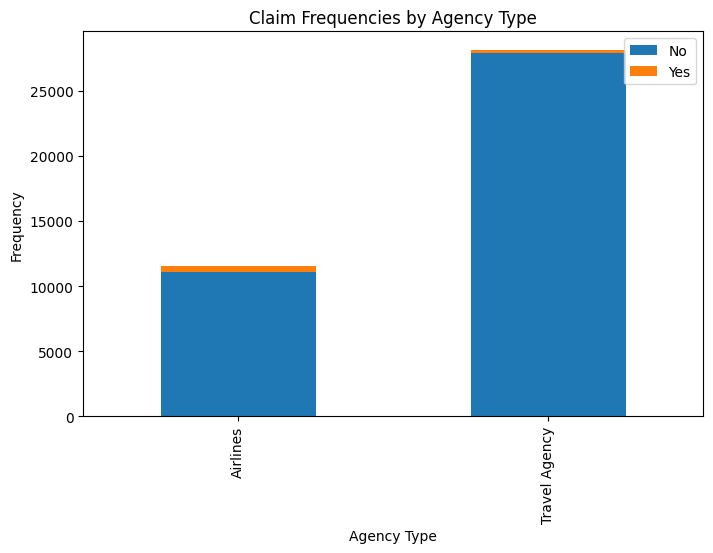

----Proportion Table----
Claim             No  Yes
Agency Type              
Airlines       11087  437
Travel Agency  27899  238

----Percentage Table----
Claim                 No       Yes
Agency Type                       
Airlines       96.207914  3.792086
Travel Agency  99.154139  0.845861


In [14]:
plot_claim_frequencies(travel, 'Agency Type', figsize=(8, 5))

Jenis agen asuransi perjalanan juga tampaknya berdampak pada status klaim. Jenis "Travel Agency" lebih sering digunakan dibandingkan dengan jenis "Airlines". Walau begitu "Airlines" memiliki tingkat klaim yang lebih tinggi. Data ini dapat bermanfaat dalam memprediksi status klaim, karena sifat klaim mungkin berbeda di antara jenis agensi.

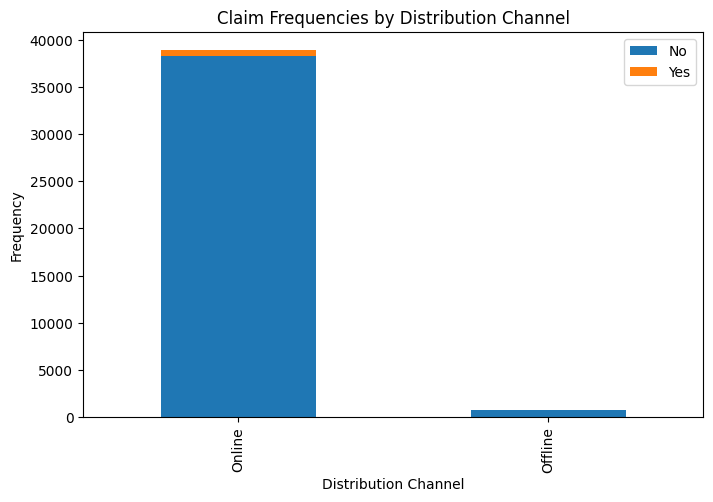

----Proportion Table----
Claim                    No  Yes
Distribution Channel            
Online                38266  664
Offline                 720   11

----Percentage Table----
Claim                        No       Yes
Distribution Channel                     
Online                98.294375  1.705625
Offline               98.495212  1.504788


In [15]:
plot_claim_frequencies(travel, 'Distribution Channel', figsize=(8, 5))

Walau jalur distribusi online lebih populer, namun diketahui bahwa persentase antara saluran distribusi tidak berbeda jauh untuk status klaim-nya. Informasi ini bisa jadi pertimbangkan untuk melihat lebih jauh pengaruhnya terhadap prediksi status klaim pada model nantinya.

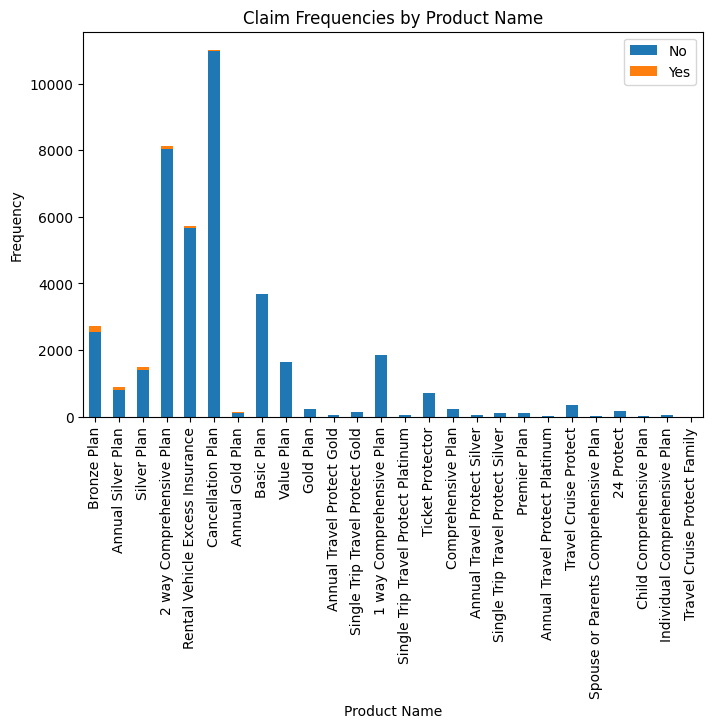

----Proportion Table----
Claim                                      No    Yes
Product Name                                        
Bronze Plan                            2557.0  161.0
Annual Silver Plan                      789.0  108.0
Silver Plan                            1396.0  108.0
2 way Comprehensive Plan               8038.0   95.0
Rental Vehicle Excess Insurance        5662.0   64.0
Cancellation Plan                     10978.0   31.0
Annual Gold Plan                        122.0   16.0
Basic Plan                             3676.0   16.0
Value Plan                             1633.0   14.0
Gold Plan                               224.0   12.0
Annual Travel Protect Gold               56.0    7.0
Single Trip Travel Protect Gold         127.0    7.0
1 way Comprehensive Plan               1841.0    7.0
Single Trip Travel Protect Platinum      42.0    5.0
Ticket Protector                        706.0    5.0
Comprehensive Plan                      241.0    4.0
Annual Travel Protect

In [16]:
plot_claim_frequencies(travel, 'Product Name', figsize=(8, 5))

Nama produk yang berbeda memiliki proporsi dan persentase status klaim yang berbeda-beda. Informasi ini dapat dimanfaatkan sebagai fitur dalam model machine learning untuk memprediksi status klaim berdasarkan nama produk. Model dapat mempelajari pola dari data historis untuk memprediksi klaim di masa mendatang, dengan mempertimbangkan nama produk sebagai faktor yang relevan.

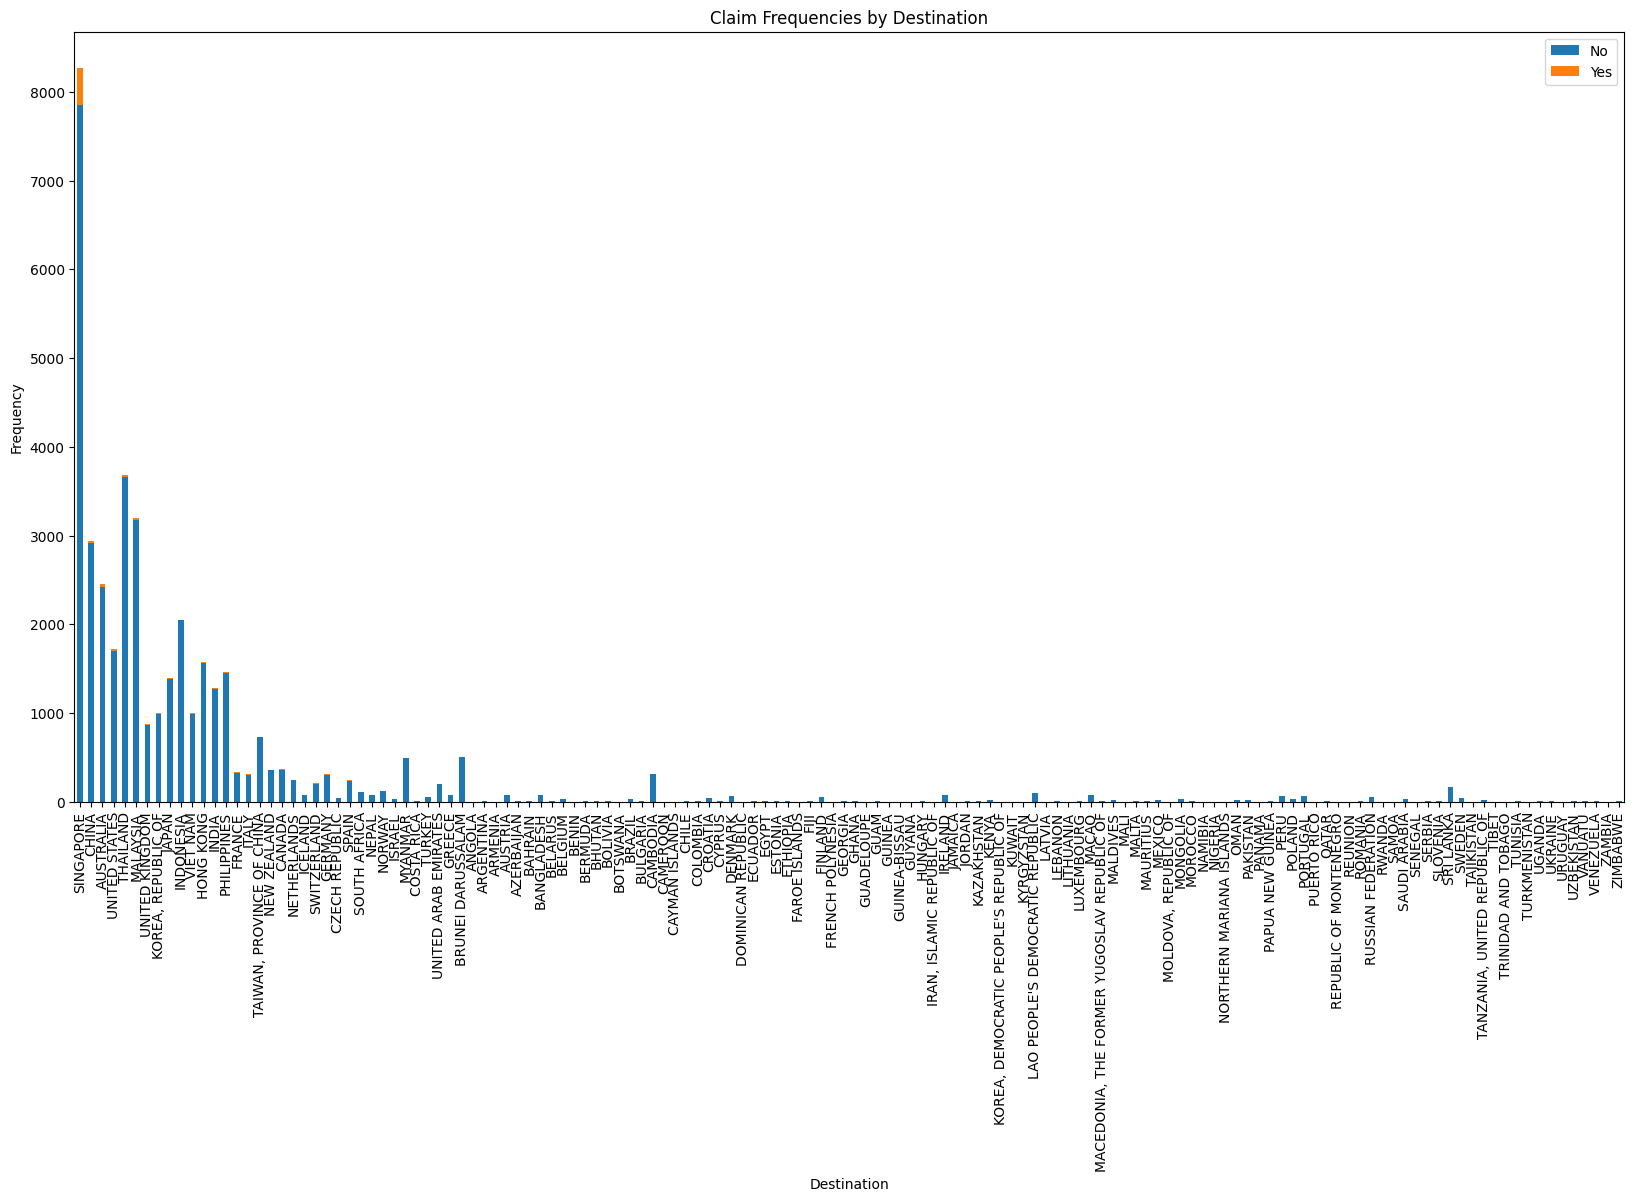

----Proportion Table----
Claim              No    Yes
Destination                 
SINGAPORE      7850.0  415.0
CHINA          2911.0   33.0
AUSTRALIA      2423.0   30.0
UNITED STATES  1695.0   29.0
THAILAND       3661.0   24.0
...               ...    ...
UZBEKISTAN        7.0    NaN
VANUATU           3.0    NaN
VENEZUELA         4.0    NaN
ZAMBIA            2.0    NaN
ZIMBABWE          3.0    NaN

[138 rows x 2 columns]

----Percentage Table----
Claim                  No       Yes
Destination                        
SINGAPORE       94.978826  5.021174
CHINA           98.879076  1.120924
AUSTRALIA       98.777008  1.222992
UNITED STATES   98.317865  1.682135
THAILAND        99.348711  0.651289
...                   ...       ...
UZBEKISTAN     100.000000       NaN
VANUATU        100.000000       NaN
VENEZUELA      100.000000       NaN
ZAMBIA         100.000000       NaN
ZIMBABWE       100.000000       NaN

[138 rows x 2 columns]


In [17]:
plot_claim_frequencies(travel, 'Destination', figsize=(20, 10))

Destinasi yang berbeda memiliki proporsi dan persentase status klaim yang berbeda juga. Walau destinasi Thailand dan Malaysia lebih populer dibanding Cina, diketahui jumlah klaim destinasi Cina lebih tinggi. Informasi ini dapat dimanfaatkan sebagai fitur dalam model pembelajaran mesin untuk memprediksi status klaim berdasarkan tujuan.

### Numerical Variables

In [18]:
travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


In [19]:
travel[(travel['Duration'] < 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [20]:
travel = travel[travel['Duration'] >= 0]

Sebagaimana diketahui bahwa durasi adalah lamanya waktu perjalanan dan tidak mungkin hasilnya <0, maka data ini akan dihapus karena dianggap anomali dan tidak mungkin ada kondisi kejadian durasi -1. 

In [21]:
travel[(travel['Duration'] < 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


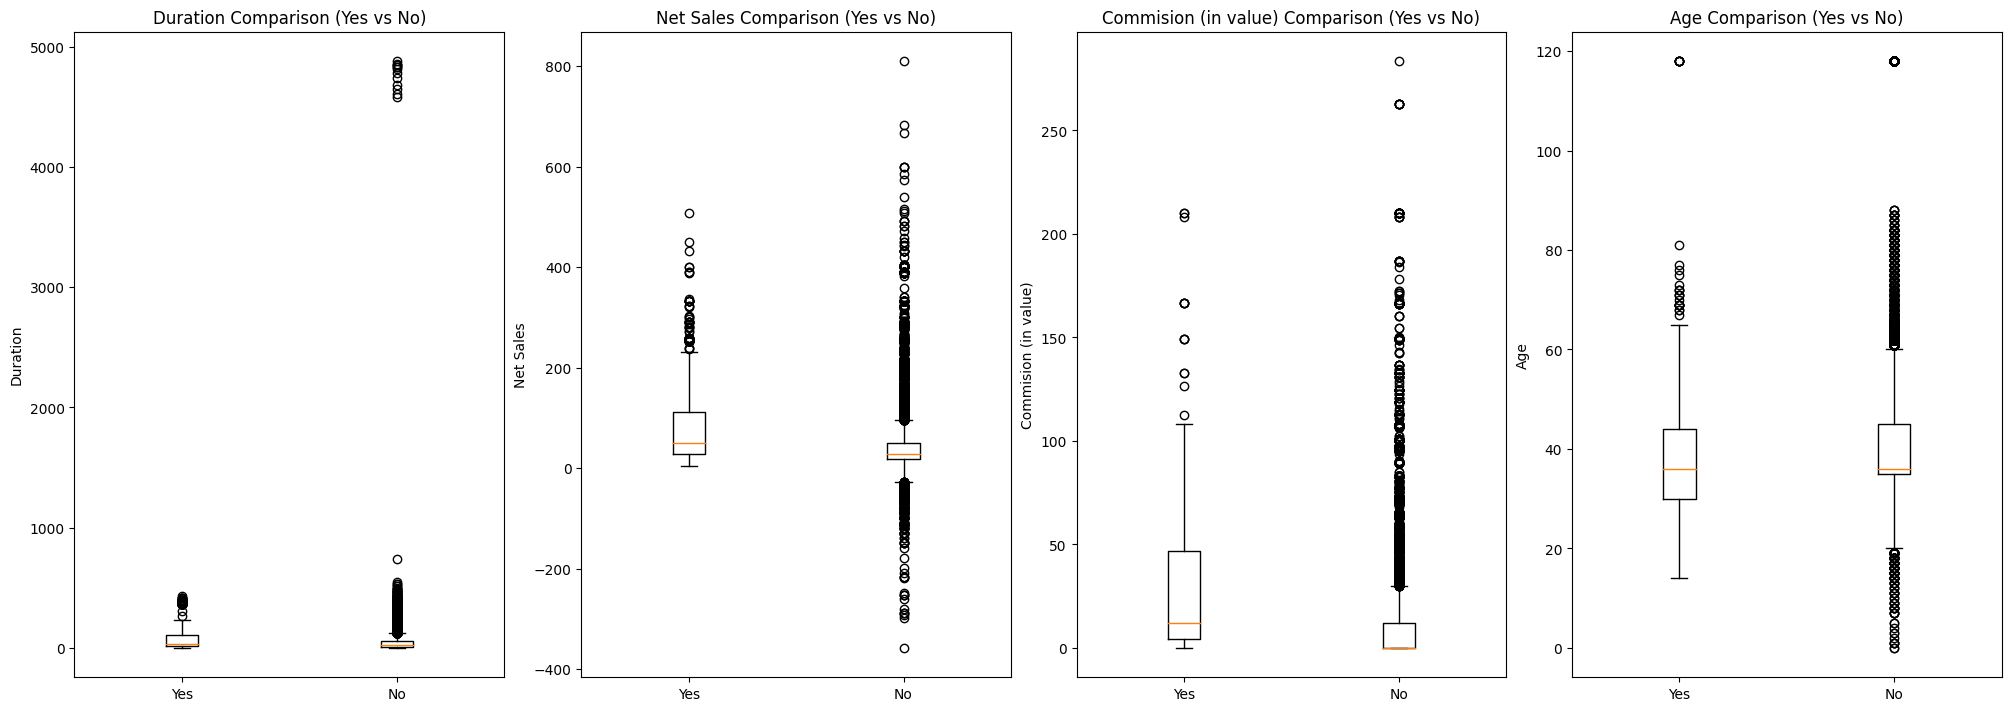

In [22]:
claim_yes = travel[travel['Claim'] == 'Yes']
claim_no = travel[travel['Claim'] == 'No']

num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 7), constrained_layout=True)

for ax, col in zip(axes, num_cols):
    ax.boxplot([claim_yes[col], claim_no[col]])
    ax.set_xticklabels(['Yes', 'No'])
    ax.set_ylabel(col)
    ax.set_title(f'{col} Comparison (Yes vs No)')

plt.show()


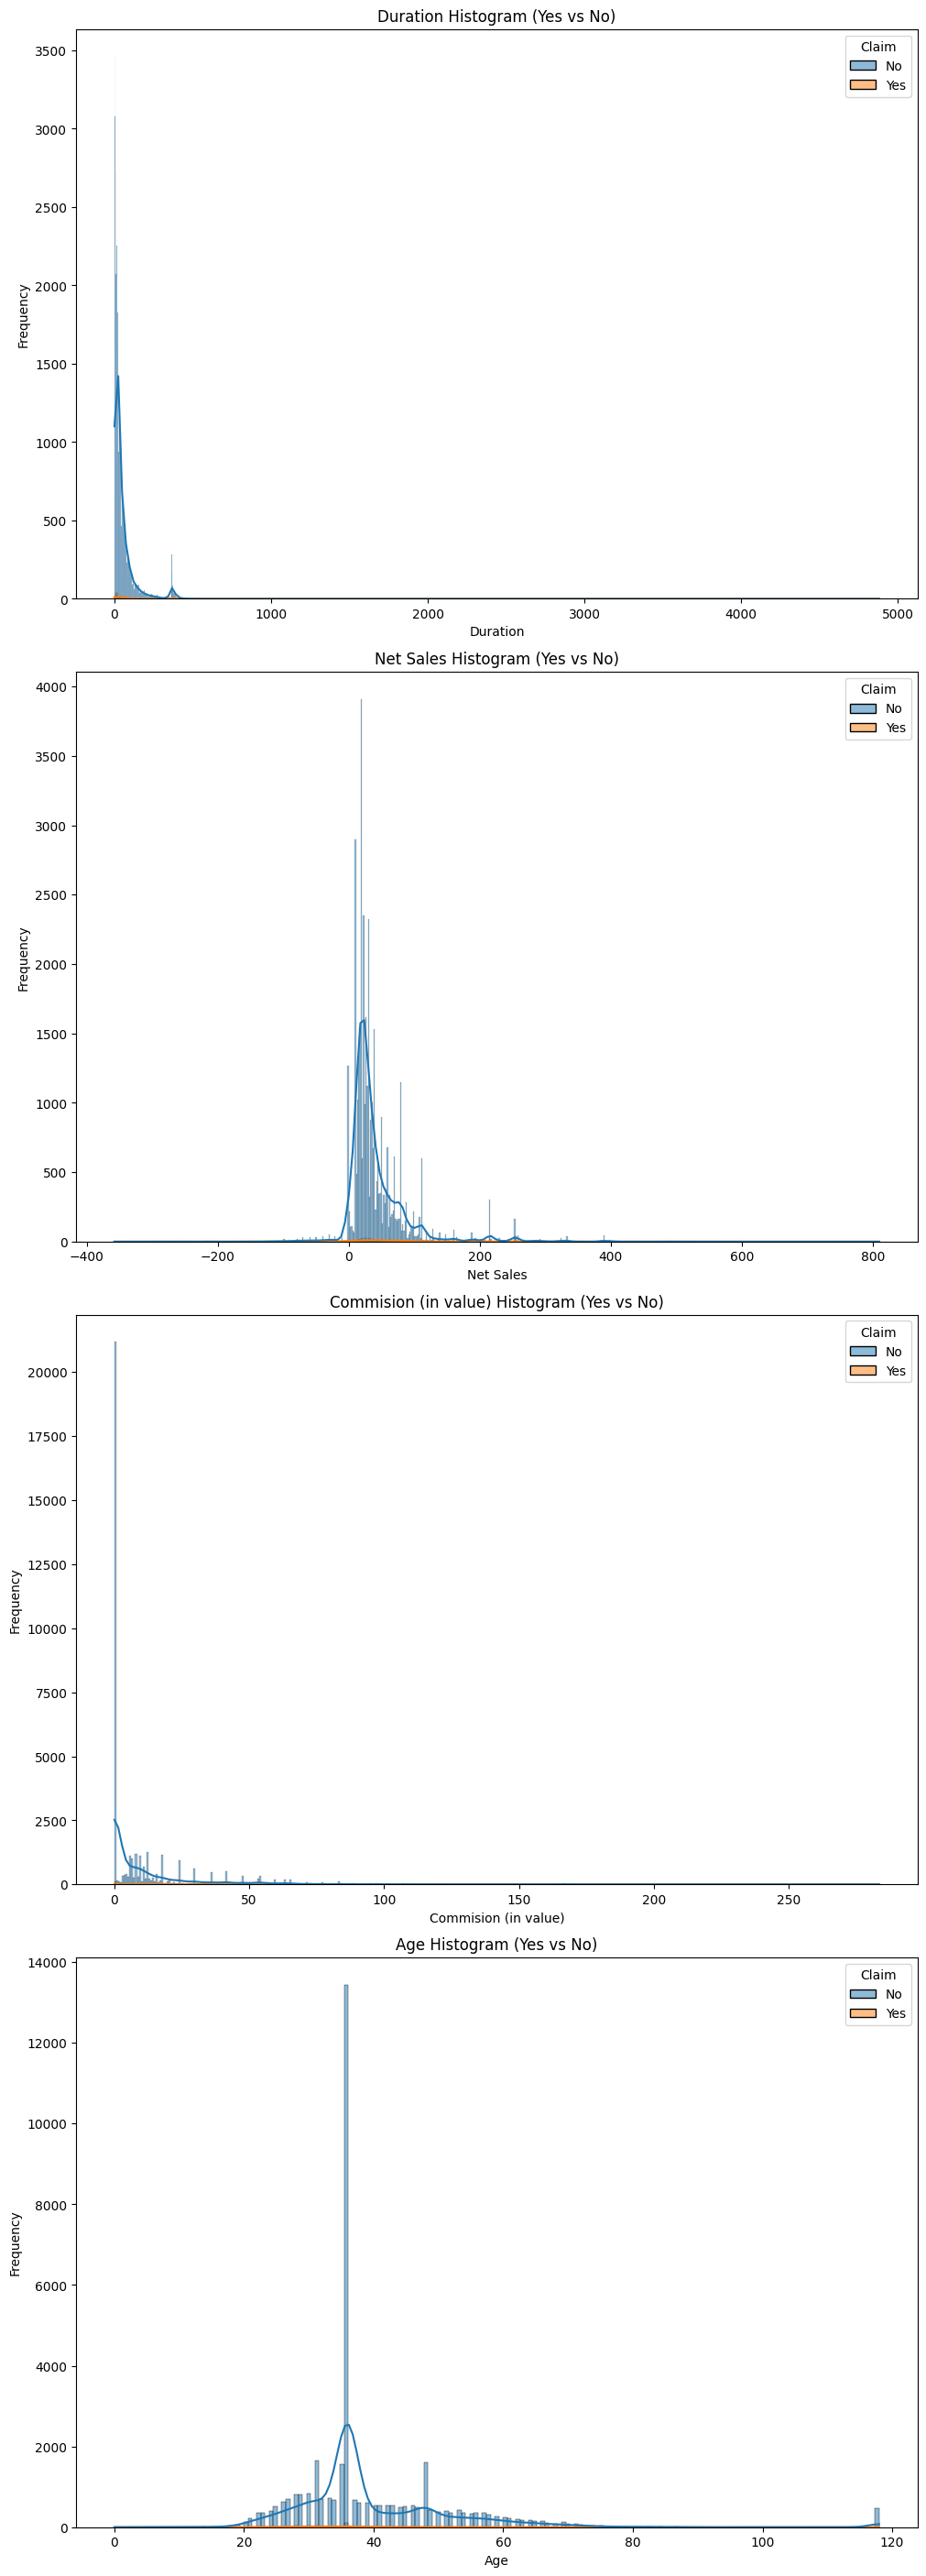

In [23]:
claim_yes = travel[travel['Claim'] == 'Yes']
claim_no = travel[travel['Claim'] == 'No']

num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 28), constrained_layout=True)

for ax, col in zip(axes, num_cols):
    sns.histplot(data=travel, x=col, hue='Claim', ax=ax, kde=True)
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)
    ax.set_title(f'{col} Histogram (Yes vs No)')

plt.show()

Diketahui bahwa persebaran setiap Variable Numerical tidak terdistribusi dengan normal, maka untuk melihat hubungan antar kolomnya dapat dilakukan dengan korelasi metode spearman. 

Untuk mempermudah melihat korelasinya dengan variable Claim, maka perlu dilakukan konversi Claim ke Yes= 1 atau No= 0.

In [24]:
travel

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


In [25]:
travel['Claim'] = travel['Claim'].replace({'Yes': 1, 'No': 0})
travel

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


In [26]:
cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

correlations = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        corr, _ = spearmanr(travel[cols[i]], travel[cols[j]])
        correlations.append([cols[i], cols[j], corr])

data_correlation = pd.DataFrame(correlations, columns=['Variable 1', 'Variable 2', 'Correlation_spearman'])
data_correlation = data_correlation.drop_duplicates(subset='Correlation_spearman').sort_values(by='Correlation_spearman', ascending=False)

data_correlation

,Variable 1,Variable 2,Correlation_spearman
4,Net Sales,Commision (in value),0.278445
0,Duration,Net Sales,0.253265
7,Commision (in value),Age,0.140777
1,Duration,Commision (in value),0.099599
8,Commision (in value),Claim,0.097859
6,Net Sales,Claim,0.091089
3,Duration,Claim,0.042509
5,Net Sales,Age,0.013427
2,Duration,Age,-0.018631
9,Age,Claim,-0.027265


Dari hasil analisa Numerical Value didapatkan beberapa insight:
1. Duration kurang dari 0 tidak mungkin ada, maka dilakukan penghapusan baris yang memiliki durasi < 0
1. Persebaran Claim dengan value 'Yes' memiliki IQR yang lebih besar dibandingkan 'No'. Ini menjadi indikasi kelas 'Yes' lebih tersebar antara range Q3 sampai Q1. Perlu dianalisa lebih lanjut terkait data imbalance pada Claim Variable sebagai target.
1. Ketika tidak ada korelasi yang kuat antara variabel numerik, ini menunjukkan bahwa variabel tersebut dapat memberikan informasi yang unik atau independen untuk model. Dalam hal ini, menyertakan variabel dalam kumpulan fitur mungkin bermanfaat bagi performa model.

### Data Balancing (Imbalanced Classes)

In [27]:
calculate_proportion(travel, 'Claim')

0 = 98.30%
1 = 1.70%


Diketahui bahwa data Claim sangat tidak seimbang. Tidak sampai 2% data yang menunjukan klaim "No". Perlu dilakukan treatment lanjutan dalam proses preprocessing agar peforma model bisa menjadi lebih baik.

# Preprocessing & Feature Selection

In [28]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39659 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39659 non-null  object 
 1   Agency Type           39659 non-null  object 
 2   Distribution Channel  39659 non-null  object 
 3   Product Name          39659 non-null  object 
 4   Duration              39659 non-null  int64  
 5   Destination           39659 non-null  object 
 6   Net Sales             39659 non-null  float64
 7   Commision (in value)  39659 non-null  float64
 8   Age                   39659 non-null  int64  
 9   Claim                 39659 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB


In [29]:
# Create an empty DataFrame to store the results
unique_values_df = pd.DataFrame(columns=["Column Name", "Number of Unique", "Unique Values"])

# Iterate over columns in the 'travel' DataFrame
for column in travel.columns:
    # Calculate the number of unique values in each column
    num_unique = travel[column].nunique()
    
    # Get the unique values in each column
    unique_vals = travel[column].unique()
    
    # Create a temporary DataFrame for each column
    temp_df = pd.DataFrame({
        "Column Name": [column],
        "Number of Unique": [num_unique],
        "Unique Values": [unique_vals]
    })
    
    # Concatenate the temporary DataFrame to the 'unique_values_df'
    unique_values_df = pd.concat([unique_values_df, temp_df], ignore_index=True)
    
unique_values_df

,Column Name,Number of Unique,Unique Values
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Duration,436,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
5,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
6,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
7,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
8,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."
9,Claim,2,"[0, 1]"


Proses processing yang dilakukan adalah encoding untuk data kategori:
- One Hot Encoding : Agency Type, Distribution Channel --> Unique Value sedikit
- Binary Encoding : Agency, Product Name, Destination --> Unique Value sangat banyak

Sebagaimana analisa proses sebelumnya, diketahui bahwa jalur distribusi mungkin tidak berpengaruh banyak terhadap model karena memiliki proporsi presentase yang tidak jauh berbeda (Online 1.7% & Offline 1.5%). Untuk itu akan dicoba model dengan dan tanpa atribut jalur distribusi

In [30]:
calculate_proportion(travel, 'Claim')

0 = 98.30%
1 = 1.70%


Diketahui bahwa proporsinya sangat tidak seimbang, maka dalam modeling ini akan dilakukan analisa dengan metode imbalance dengan oversampling dan undersampling untuk mengetahui treatment apa yang paling cocok.

- Oversampling
    - RandomOverSampler
    - ADASYN
    - SMOTE
    
- Undersampling
    - RandomUnderSampler
    - NearMiss
    - TomekLinks

### Model with Full Features

In [31]:
# Define dependent variable as target / label of prediction
y = travel['Claim']

# Define independent variable as feature
x = travel.drop(columns = ['Claim'])

# Split Dataset for Training (80%) and Testing (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1,
    stratify=y
) # 0.2 is 20% of the data as a tester  |  1 just for random | stratify for sampe proportion y

In [32]:
# Preprocess

# One Hot Encoding
one_hot_var = ['Agency Type', 'Distribution Channel']
one_hot_encoder = OneHotEncoder()

# Binary Encoding
binary_var = ['Agency', 'Product Name', 'Destination']
binary_encoder = ce.BinaryEncoder()

# Combine preprocess in one table
preprocess= ColumnTransformer([
                                ('one_hot', one_hot_encoder, one_hot_var),
                                ('binary', binary_encoder, binary_var),
                                ], remainder='passthrough')

In [33]:
# Combine spliting data into preprocessing usin .fit_transform
x_train_prep = preprocess.fit_transform(x_train)
x_test_prep = preprocess.transform(x_test)

x_train_prep = pd.DataFrame(x_train_prep)
x_test_prep = pd.DataFrame(x_test_prep)

x_test_prep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,87.0,9.9,5.94,39.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,94.0,20.0,0.00,36.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,109.0,23.0,0.00,40.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70.0,22.0,7.70,44.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,20.0,5.00,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7927,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,18.0,6.30,38.0
7928,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,38.0,0.00,36.0
7929,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,57.0,14.25,31.0
7930,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,4.50,44.0


In [34]:
# Getting Feature Names from one_hot_encoding
name_one_hot = list(preprocess.transformers_[0][1].get_feature_names_out())

# Getting Feature Names from binary_encoding
name_binary = list(preprocess.transformers_[1][1].get_feature_names_out())

# Adjust sequence in naming based on ColumnTransformer
feature_names = name_one_hot + name_binary + ['Duration','Net Sales','Commision (in value)','Age']
feature_names

['Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Distribution Channel_Offline',
 'Distribution Channel_Online',
 'Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Agency_4',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7',
 'Duration',
 'Net Sales',
 'Commision (in value)',
 'Age']

In [35]:
# Input feature_names into x_train/test_preprocess
x_train_prep.columns = feature_names
x_test_prep.columns = feature_names

x_train_prep

,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Duration,Net Sales,Commision (in value),Age
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,48.5,12.13,42.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,22.0,7.70,67.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,79.2,47.52,31.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,34.0,0.00,36.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,96.0,33.60,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31722,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,29.7,17.82,34.0
31723,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,20.0,0.00,35.0
31724,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,28.0,47.0,0.00,36.0
31725,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,58.0,47.0,0.00,36.0


In [36]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'scaler': [None,MinMaxScaler(), StandardScaler(), RobustScaler()],
        'imbalance':[None,RandomOverSampler(random_state=1),
                     ADASYN(random_state=1),
                     SMOTE(random_state=1),
                     RandomUnderSampler(random_state=1),
                     NearMiss(),
                     TomekLinks()],
        'classifier' : [LogisticRegression(), 
                        SGDClassifier(), 
                        KNeighborsClassifier(), 
                        DecisionTreeClassifier(), 
                        AdaBoostClassifier(), 
                        GradientBoostingClassifier(),
                        XGBClassifier()]
    }
]

# Define Model with Scaler and Imbalance Treatment
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Default Scaler
    ('imbalance', SMOTE(random_state=1)), # Default Imbalance
    ('classifier', LogisticRegression()) # Default Model
])

total_cpu_cores = multiprocessing.cpu_count()
desired_num_jobs = int(0.8 * total_cpu_cores)

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=desired_num_jobs)

# Start the timer
start_time = time.time()

# Fit x_train_prep & y_train
grid_search.fit(x_train_prep, y_train)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Convert elapsed time to minutes and seconds
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Get the best estimator and its performance scores
pipeline = grid_search.best_estimator_
best_scores = grid_search.best_score_

# Print the results
print("Best Scaler:", pipeline.named_steps['scaler'])
print("Best Imbalance:", pipeline.named_steps['imbalance'])
print("Best Model:", pipeline.named_steps['classifier'])
print("Best Scores:", best_scores)

# Print the elapsed time
print("Elapsed Time:", minutes, "minutes", seconds, "seconds")

Best Scaler: None
Best Imbalance: RandomUnderSampler(random_state=1)
Best Model: LogisticRegression()
Best Scores: 0.8149759966882423
Elapsed Time: 5 minutes 46 seconds


C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
pipeline.fit(x_train_prep, y_train)

y_pred = pipeline.predict(x_test_prep)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      7797
           1       0.05      0.70      0.10       135

    accuracy                           0.78      7932
   macro avg       0.52      0.74      0.49      7932
weighted avg       0.98      0.78      0.86      7932



C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Untuk membuat model lebih efisien dalam konteks learning time dan roc_auc score, maka akan dicoba untuk menggunakan model dengan features pilihan. Untuk selanjutnya sebagaimana diketahui model akan berfokus pada Logistic Regression karena memiliki score paling tinggi dengan tidak menggunakan scaler.

### Model Features Selected

In [38]:
# Feature Selection After Preprocess
select = SelectPercentile(percentile = 50)
select.fit(x_train_prep, y_train)

x_train_selected = select.transform(x_train_prep)
x_test_selected = select.transform(x_test_prep)

In [39]:
# Choosing Selected Feature
df_selected = pd.DataFrame({
                            'var': feature_names,
                            'indicator': select.get_support()
})

df_selected[df_selected['indicator']==True]

,var,indicator
0,Agency Type_Airlines,True
1,Agency Type_Travel Agency,True
6,Agency_2,True
8,Agency_4,True
10,Product Name_1,True
11,Product Name_2,True
13,Product Name_4,True
19,Destination_5,True
20,Destination_6,True
21,Destination_7,True


In [40]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'imbalance':[None,RandomOverSampler(random_state=1),
                     ADASYN(random_state=1),
                     SMOTE(random_state=1),
                     RandomUnderSampler(random_state=1),
                     NearMiss(),
                     TomekLinks()],
        'classifier' : [LogisticRegression()] 
    }
]

# Define Model with Scaler and Imbalance Treatment
pipeline_selected = Pipeline([
    ('imbalance', SMOTE(random_state=1)), # Default Imbalance
    ('classifier', LogisticRegression()) # Default Model
])

total_cpu_cores = multiprocessing.cpu_count()
desired_num_jobs = int(0.8 * total_cpu_cores)

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline_selected, param_grid, cv=5, scoring='roc_auc', n_jobs=desired_num_jobs)

# Start the timer
start_time = time.time()

# Fit x_train_prep & y_train
grid_search.fit(x_train_selected, y_train)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Convert elapsed time to minutes and seconds
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Get the best estimator and its performance scores
pipeline_selected = grid_search.best_estimator_
best_scores = grid_search.best_score_

# Print the results
print("Best Imbalance:", pipeline_selected.named_steps['imbalance'])
print("Best Model:", pipeline_selected.named_steps['classifier'])
print("Best Scores:", best_scores)

# Print the elapsed time
print("Elapsed Time:", minutes, "minutes", seconds, "seconds")

Best Imbalance: RandomUnderSampler(random_state=1)
Best Model: LogisticRegression()
Best Scores: 0.8119230255828326
Elapsed Time: 0 minutes 2 seconds


C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
pipeline_selected.fit(x_train_selected, y_train)

y_pred_selected = pipeline_selected.predict(x_test_selected)
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      7797
           1       0.05      0.73      0.09       135

    accuracy                           0.76      7932
   macro avg       0.52      0.75      0.48      7932
weighted avg       0.98      0.76      0.85      7932



C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dari hasil preprocessing feature selection diketahui bahwa:
- Walau feature pilihan menghasilkan nilai ROC_AUC lebih rendah, namun secara keseluruhan precision, recall f1 lebih baik lebih baik
- Model lebih baik peformanya tanpa menggunakan scaler
- Metode imbalance RandomUnderSampler menjadi metode paling baik
- Model LogisticRegression menjadi model yang paling baik

Model Pilihan:
- Model menggunakan feature pilihan dari SelectPercentile
- Model tidak menggunakan scaler
- Imbalance handling dengan RandomUnderSampler 
- Model menggunakan LogisticRegression

# Modeling & Tuning

In [46]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'classifier__max_iter': [100, 250, 500, 750, 1000]
}

# Define Selected Model
pipeline_tuning = Pipeline([
    ('imbalance', RandomOverSampler(random_state=1)),
    ('classifier', LogisticRegression())
])


# Create GridSearchCV instance
grid_search_tune = GridSearchCV(pipeline_tuning,
                           param_grid,
                           cv=5, 
                           scoring='roc_auc', 
                           n_jobs=-1)

# Start the timer
start_time = time.time()

# Fit the grid search on the data
grid_search_tune.fit(x_train_selected, y_train)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Convert elapsed time to minutes and seconds
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search_tune.best_params_)
print("Best Score: ", grid_search_tune.best_score_)

# Print the elapsed time
print("Elapsed Time:", minutes, "minutes", seconds, "seconds")

Best Hyperparameters:  {'classifier__C': 100, 'classifier__max_iter': 500}
Best Score:  0.8119883384014219
Elapsed Time: 0 minutes 49 seconds


In [47]:
# Model Before Feature Selection
pipeline_before = Pipeline([
    ('imbalance', RandomOverSampler(random_state=1)), 
    ('classifier', LogisticRegression())
])
pipeline_before.fit(x_train_prep, y_train)

# Model After Feature Selection
pipeline_after = Pipeline([
    ('imbalance', RandomOverSampler(random_state=1)), 
    ('classifier', LogisticRegression())
])
pipeline_after.fit(x_train_selected, y_train)

# Model After Feature Selection + Tuning
pipeline_tuning = grid_search_tune.best_estimator_
pipeline_tuning.fit(x_train_selected, y_train)

# Make predictions on the test set
y_pred_before = pipeline_before.predict(x_test_prep)
y_pred_after = pipeline_after.predict(x_test_selected)
y_pred_tuning = pipeline_tuning.predict(x_test_selected)

# Calculate the ROC AUC score for each model
roc_auc_before = roc_auc_score(y_test, y_pred_before)
roc_auc_after = roc_auc_score(y_test, y_pred_after)
roc_auc_tuning = roc_auc_score(y_test, y_pred_tuning)

print("ROC AUC Before Feature Selection:", roc_auc_before)
print("ROC AUC After Feature Selection:", roc_auc_after)
print("ROC AUC After Feature Selection + Tuning:", roc_auc_tuning)

C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Angga Gustama Putra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

ROC AUC Before Feature Selection: 0.7340971598763057
ROC AUC After Feature Selection: 0.7435252875037408
ROC AUC After Feature Selection + Tuning: 0.7475496273495505


In [48]:
classification_report_before = classification_report(y_test, y_pred_before)
classification_report_after = classification_report(y_test, y_pred_after)
classification_report_tuning = classification_report(y_test, y_pred_tuning)

print("Classification Report Before Feature Selection:")
print(classification_report_before)
print("Classification Report After Feature Selection:")
print(classification_report_after)
print("Classification Report After Feature Selection + Tuning:")
print(classification_report_tuning)

Classification Report Before Feature Selection:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      7797
           1       0.05      0.68      0.10       135

    accuracy                           0.78      7932
   macro avg       0.52      0.73      0.49      7932
weighted avg       0.98      0.78      0.86      7932

Classification Report After Feature Selection:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      7797
           1       0.05      0.71      0.10       135

    accuracy                           0.77      7932
   macro avg       0.52      0.74      0.48      7932
weighted avg       0.98      0.77      0.86      7932

Classification Report After Feature Selection + Tuning:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      7797
           1       0.05      0.72      0.10       135

    accuracy                   

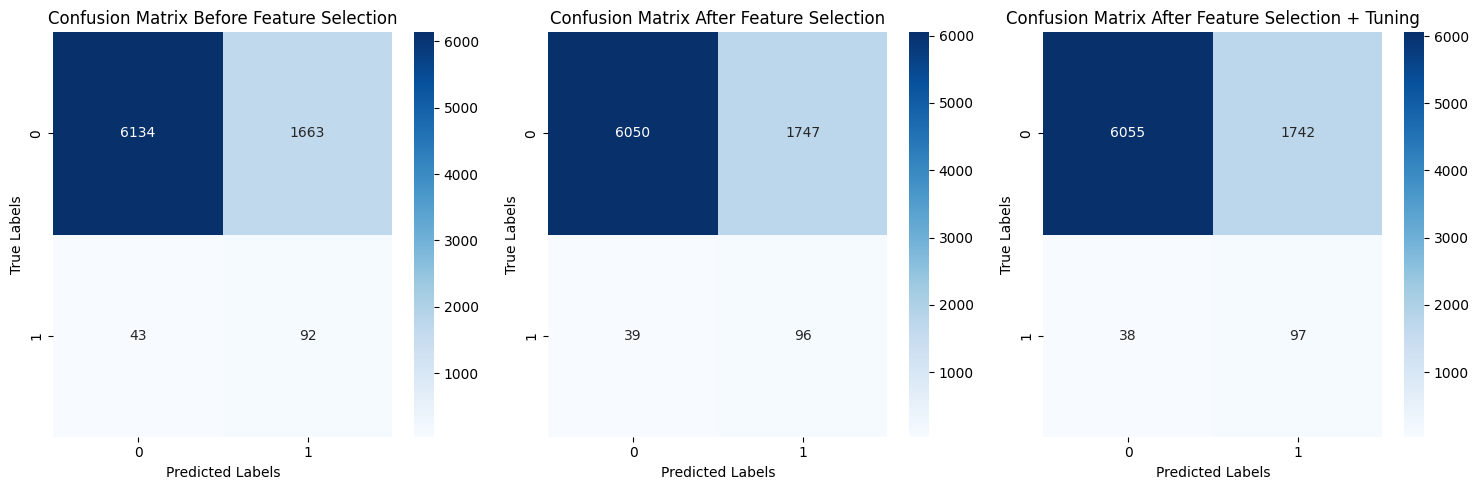

In [71]:
cm_before = confusion_matrix(y_test, y_pred_before)
cm_after = confusion_matrix(y_test, y_pred_after)
cm_tuning = confusion_matrix(y_test, y_pred_tuning)

# Plot the confusion matrix heatmaps
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.heatmap(cm_before, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Confusion Matrix Before Feature Selection")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(cm_after, annot=True, cmap="Blues", fmt="d", ax=axes[1])
axes[1].set_title("Confusion Matrix After Feature Selection")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

sns.heatmap(cm_tuning, annot=True, cmap="Blues", fmt="d", ax=axes[2])
axes[2].set_title("Confusion Matrix After Feature Selection + Tuning")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

## Save Model

In [69]:
import pickle

# Save Model
filename = 'final_model.sav'
pickle.dump(pipeline_tuning, open(filename, 'wb'))

In [70]:
# Load Model
filename = 'final_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(x_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      7797
           1       0.05      0.72      0.10       135

    accuracy                           0.78      7932
   macro avg       0.52      0.75      0.49      7932
weighted avg       0.98      0.78      0.86      7932



# Conclusion

## Model Overview

Dari hasil proses pembuatan model, diketahui bahwa model terbaik adalah:
- Model dengan atribute pilihan berdasarkan SelectPercentile
- Tidak menggunakan scaler
- Imbalance handling dengan RandomUnderSampler
- Model menggunakan LogisticRegression
    - C= 100, 
    - max_iter= 500
    
Secara keseluruhan, hasil menunjukkan bahwa model bekerja dengan baik dalam hal precision dan recall untuk kelas 0, tetapi buruk untuk kelas 1. precision rendah dan skor F1 untuk kelas 1 menunjukkan bahwa model berjuang untuk memprediksi instance kelas 1 secara akurat. 

Skor ROC AUC sebesar 0.75 menunjukkan bahwa model tersebut memiliki kemampuan klasifikasi cukup baik khususnya untuk prediksi kelas 1 (claim).

In [76]:
from sklearn.metrics import accuracy_score

roc_auc_tuning = roc_auc_score(y_test, y_pred_tuning)
print(f"ROC AUC score: {roc_auc_tuning:.2f}")

accuracy = accuracy_score(y_test, y_pred_tuning)
percentage_predicted = accuracy * 100

print(f"Percentage of predicted labels: {percentage_predicted:.2f}%")

ROC AUC score: 0.75
Percentage of predicted labels: 77.56%


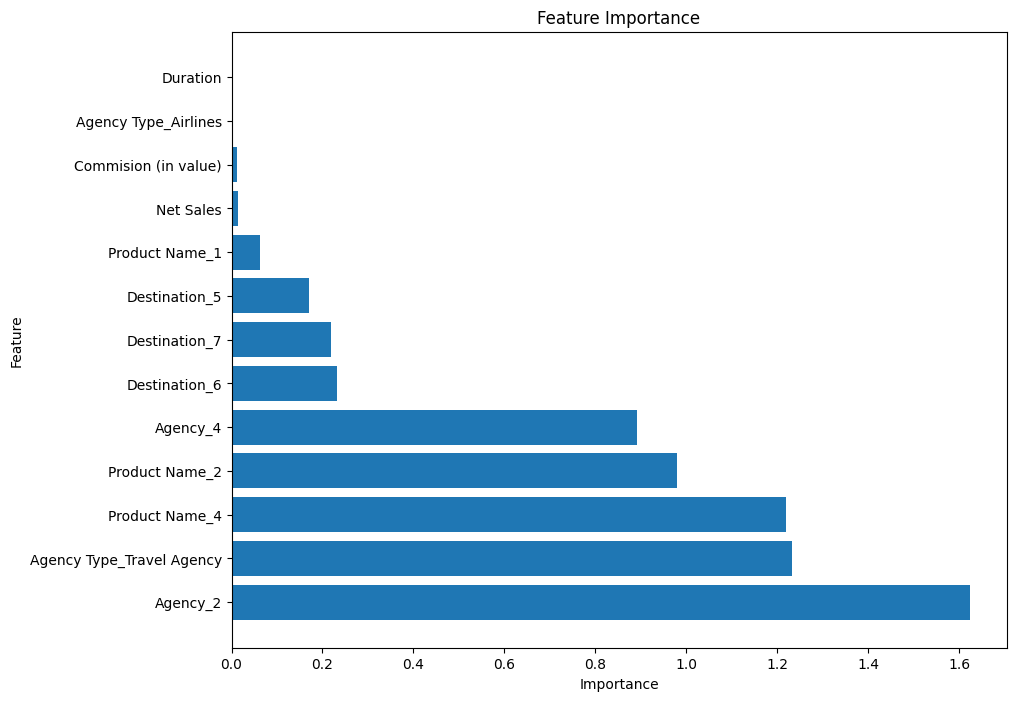

In [68]:
df_selected = pd.DataFrame({'var': feature_names, 'indicator': select.get_support()})

# Get the regression model step from the pipeline
regression_model = pipeline_tuning.named_steps['classifier']

# Get the coefficients for the positive class
coefficients = regression_model.coef_[0]

# Create a DataFrame to store the feature importances
importance_table = pd.DataFrame({'Feature': df_selected[df_selected['indicator']==True]['var'], 'Importance': np.abs(coefficients)})

# Sort the DataFrame by importance score
importance_table.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_table['Feature'], importance_table['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Hal lain yang dapat diketahui adalah 3 faktor mempengaruhi status klaim pada konteks model ini adalah:
- Agency <br> Agency memiliki efek substansial pada status klaim karena kewenangan, keahlian, proses administrasi, dan peran mereka dalam pengambilan keputusan kalim. Keputusan dan tindakan mereka dapat mempengaruhi hasil klaim secara signifikan, menjadikan keterlibatan mereka penting dalam menentukan status klaim.
- Agency_Type <br> Maskapai penerbangan dan agen perjalanan memiliki kebijakan dan syarat dan ketentuan mereka sendiri mengenai reservasi, pembatalan, pengembalian uang, dan kompensasi. Kebijakan ini menguraikan hak dan tanggung jawab agen dan pelanggan. Syarat dan ketentuan khusus dapat mempengaruhi status klaim, karena menentukan kelayakan klaim dan kompensasi yang dapat diberikan.
- Product Name <br> Berbagai jenis produk asuransi perjalanan dapat memiliki ketentuan dan cakupan yang berbeda. Misalnya, beberapa produk mungkin hanya melindungi terhadap kecelakaan atau kerugian tertentu, sementara yang lain mungkin mencakup lebih banyak jenis risiko. Model mempelajari pola-pola dari data historis yang menunjukkan kecenderungan tertentu pada jenis produk tertentu dalam hal klaim yang valid atau tidak valid.<br><br>

## Business Overview

Estimate Cost of Missed Claims:

- Total Jumlah Klaim per Tahun: 10.000 klaim
- Tingkat Akurasi: 77,56% (0,7756)
- Klaim yang terlewatkan: 10.000 klaim * (1 - 0,7756) = 2.244 klaim
- Biaya Klaim yang Terlewatkan: Mari kita asumsikan biaya rata-rata per klaim adalah USD 1.000.
     (Kompensasi, Biaya Hukum, Konsekuensi Regulasi, Biaya administrasi dan operasional tambahan, Kerusakan Reputasi)
- Biaya Klaim yang Terlewatkan = USD 1.000 * 2.244 klaim = USD 2.244.000

Benefit of Correctly Predicted Claims:

- Klaim yang Diprediksi dengan Benar: 10.000 klaim * 0,7756 = 7.756 klaim
- Manfaat Klaim yang Diprediksi dengan Benar: Mari kita asumsikan manfaat rata-rata per klaim adalah USD 500. (Biaya yang terkait dengan pemrosesan dan investigasi, Efisiensi Operasional Administratif, Pelanggan Baru)
- Manfaat Klaim yang Diprediksi dengan Benar = USD 500 * 7.756 klaim = USD 3.878.000

# Recommendation

Untuk mengoptimalkan peforma machine learning, mungkin dapat dilakukan beberapa proses tambahan:
- Pemilihan treatment undersampling / oversampling dan parameter tuning yang lebih beragam. Tentunya hal ini harus dipertimbangkan dengan waktu training (fitting). <br><br>
- Pencarian data Jenis Kejadian. Misalnya, klaim yang berkaitan dengan kecelakaan, kehilangan bagasi, pembatalan perjalanan, atau gangguan kesehatan mungkin memiliki karakteristik yang berbeda dan perlu pendekatan yang berbeda dalam penilaian. Oleh karena itu, mengidentifikasi jenis kejadian yang menjadi faktor penting dalam prediksi klaim dapat membantu meningkatkan kinerja model.<br><br>

Agar projek ini lebih terukur (measurable), sebaiknya dapat penyediaan data dan dilakukan pengukuran berikut:
- Waktu Penyelesaian Klaim <br> Perusahaan dapat mengukur waktu rata-rata yang dibutuhkan untuk memproses dan menyelesaikan klaim asuransi perjalanan. Menggunakan model machine learning yang akurat dapat membantu mempercepat proses klaim dengan mengidentifikasi klaim yang valid secara otomatis, sehingga mengurangi waktu tunggu pelanggan.<br><br>
- Pengurangan Klaim Tertunda <br> Perusahaan dapat mengukur jumlah klaim yang tertunda atau dalam proses lebih lama dari waktu yang diharapkan sebelum diselesaikan. Dengan menggunakan model machine learning yang dapat memprediksi status klaim secara akurat, perusahaan dapat mengurangi jumlah klaim yang terjebak dalam proses yang berlarut-larut, sehingga meningkatkan kepuasan pelanggan. <br><br>
- Tingkat Kepuasan Pelanggan <br> Perusahaan dapat mengukur tingkat kepuasan pelanggan secara keseluruhan melalui survei kepuasan atau melalui ulasan pelanggan. Tingkat kepuasan yang tinggi menunjukkan bahwa pelanggan merasa puas dengan proses klaim yang cepat, adil, dan efisien.